# Predicting the Price of laptops using Machine Learning
In this notebook, we're going to go through an example machine learning project to use the characteristics of laptops to predict their sale price.

* **Inputs:** Laptop characteristics such as company, ram, inches, retina display, cpu company, gpu and more.
* **Outputs:** Laptop sale price (in Euros).

Since we're trying to predict a number, this kind of problem is known as a **regression problem**.
We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given the characteristics of a laptop and we need to predict its sale price in euros

First we will import python necessary libraries for data exploration, computations and buliding a model

In [36]:
# Common EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Changing the data to numerical values to fit the model and splitting the data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## 2. Data
Importing our dataset which came from Kaggle : https://www.kaggle.com/datasets/owm4096/laptop-prices

# 3. Evaluation
As with many regression evaluations we are going to try them to get as low as possible

# 4. Features
This is where we can obtain different information about features in data. Following features are present in our data
<pre>
Company                 - ['Apple', 'Apple', 'HP', ..., 'Lenovo', 'HP', 'Asus']             
Product                 - ['MacBook Pro', 'Macbook Air', '250 G6', ..., 'IdeaPad 100S-14IBR','15-AC110nv (i7-6500U/6GB/1TB/Radeon)']               
TypeName                - ['Ultrabook', ..., 'Notebook', ]           
Inches                  - [13.3, 13.3, 15.6, ..., 14. , 15.6, 15.6]               
Ram                     - [8, 8, 8, ..., 2, 6, 4]             
OS                      - ['macOS', 'No OS', ..., 'Windows 10']              
Weight(kgs)             - [1.37, 1.34, 1.86, ..., 1.5 , 2.19, 2.2 ]               
Price_euros             - [1339.69,  898.94,  575.  , ...,  229.  ,  764.  ,  369.  ]           
Screen                  - ['Standard', 'Full HD', ...]           
ScreenW                 - [2560, 1440, 1920, ..., 1366, 1366, 1366]
ScreenH                 - [1600,  900, 1080, ...,  768,  768,  768]
Touchscreen             - [Yes, No]
IPSpanel                - [Yes, No]
RetinaDisplay           - [Yes, No]       
CPU_company             - ['Intel', .... , 'AMD']        
CPU_freq                - [2.3, 1.8, 2.5, ..., 1.6, 2.5, 1.6]        
CPU_model               - ['Core i5', 'Core i5 7200U', ...,'Celeron Dual Core N3050', 'Core i7 6500U']        
PrimaryStorage          - [ 128,  128,  256, ...,   64, 1024,  500]    
SecondaryStorage        - [ 0, ...., 2048]   
PrimaryStorageType      - ['SSD', ..., 'Flash Storage', 'HDD']    
SecondaryStorageType    - ['No', ...]    
GPU_company             - ['Intel', ..., 'AMD]
GPU_model               - ['Iris Plus Graphics 640', 'HD Graphics 6000', 'HD Graphics 620',..., 'HD Graphics', 'Radeon R5 M330']
</pre>

Importing the dataset and preparing it for modelling

In [51]:
lap_price = pd.read_csv("laptop_prices.csv")
lap_price.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [3]:
# Checking for NA values
lap_price.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [4]:
lap_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [5]:
lap_price["Price_euros"].mean(), lap_price["Price_euros"].median(), lap_price["Price_euros"].mode()

(1134.9690588235292,
 989.0,
 0    1099.0
 1    1799.0
 Name: Price_euros, dtype: float64)

In [6]:
lap_price["Price_euros"].var(), lap_price["Price_euros"].std()

(491054.0721074337, 700.7525041749288)

In [7]:
lap_price["Price_euros"].describe()

count    1275.000000
mean     1134.969059
std       700.752504
min       174.000000
25%       609.000000
50%       989.000000
75%      1496.500000
max      6099.000000
Name: Price_euros, dtype: float64

### Exploratory Data Analysis(EDA)

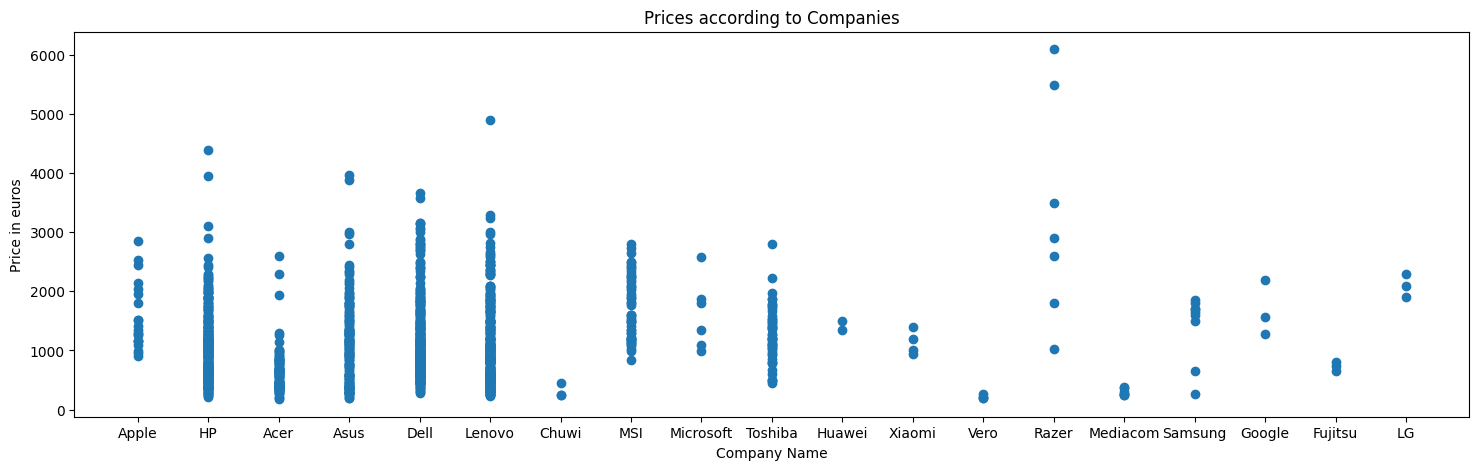

In [8]:
fig, ax = plt.subplots(figsize=(18,5))
ax.scatter(x=lap_price["Company"], y=lap_price["Price_euros"])
ax.set_ylabel("Price in euros")
ax.set_xlabel("Company Name")
ax.set_title("Prices according to Companies");

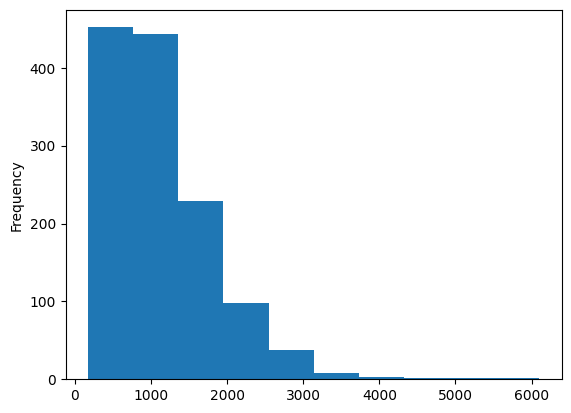

In [9]:
lap_price["Price_euros"].plot.hist();

### Since we have many object datatypes we need change to them into numerical to fit into a model 

In [10]:
# Using LabelEncoder to avoid multiple columns and decrease our computation
le = LabelEncoder()
size = lap_price.columns.size
for i in range(size):
    if lap_price[lap_price.columns[i]].dtype == 'O' :
        lap_price[lap_price.columns[i]] = le.fit_transform( lap_price[lap_price.columns[i]] )



In [11]:
lap_price.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,300,4,13.3,8,8,1.37,1339.69,3,2560,...,1,1,2.3,40,128,0,3,2,2,60
1,1,301,4,13.3,8,8,1.34,898.94,3,1440,...,0,1,1.8,40,128,0,0,2,2,53
2,7,50,3,15.6,8,4,1.86,575.00,1,1920,...,0,1,2.5,46,256,0,3,2,2,55
3,1,300,4,15.4,16,8,1.83,2537.45,3,2880,...,1,1,2.7,54,512,0,3,2,0,80
4,1,300,4,13.3,8,8,1.37,1803.60,3,2560,...,1,1,3.1,40,256,0,3,2,2,61


# 5. Modelling

Why model so early?

We know the evaluation metrics we're heading towards. We could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA.

In [12]:
# Splitting the data
X = lap_price.drop("Price_euros", axis=1)
y = lap_price["Price_euros"]

In [13]:
X.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel',
       'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [14]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1270     638.00
1271    1499.00
1272     229.00
1273     764.00
1274     369.00
Name: Price_euros, Length: 1275, dtype: float64

In [15]:
# Splitting the data into train and test set
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Due to the limited size of the dataset, we did not create a separate validation set. Instead, k-fold cross-validation was used to evaluate model performance and optimize hyperparameters. This approach maximizes the use of the available data while still providing an estimate of the model's generalization capability.

In [96]:
# Function to fit the regression models and return r2_score value
models = {"ElasticNet" : ElasticNet(max_iter=2000),
          "Ridge" : Ridge(),
          "Lasso" : Lasso(),
          "RandomForest" : RandomForestRegressor(),
          "GradientBoosting" : GradientBoostingRegressor()}
def fit_and_ev(models, X_train, y_train, X_test, y_test):
    np.random.seed(42)

    models_r2 = {}
    for name,model in models.items():
        # Fitting(finding patterns) the model
        model.fit(X_train, y_train)

        # Predicting from the test set
        y_pred = model.predict(X_test)
        models_r2[name] = (r2_score(y_test,y_pred))*100
    return models_r2

In [17]:
models_score = fit_and_ev(models = models,
                        X_train = X_train,
                        y_train = y_train, 
                        X_test = X_test,
                        y_test = y_test)
models_score

{'ElasticNet': 71.3788907178734,
 'Ridge': 74.17343790425325,
 'Lasso': 74.13463539053417,
 'RandomForest': 87.24638812076715,
 'GradientBoosting': 89.3377959298573}

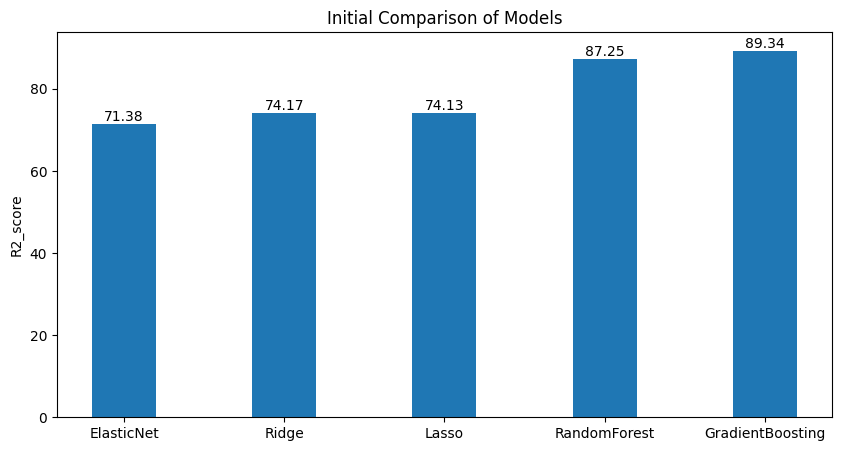

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
s = ax.bar(models_score.keys(), models_score.values(), width=0.4);
ax.set_ylabel("R2_score")
ax.set_title("Initial Comparison of Models");
for bar in s:
    val = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            val,
            f'{val:.2f}',
            ha='center',
            va='bottom')

### Hyperparameter tuning
We are going to tune our models using
* RandomizedSearchCV
* GridSearchCV

In [19]:
# Creating a function where GridSearchCV and RandomizedSearchCV is done for the different hyperparameters grid

# We are going to evaluate our model using more metrics 
mean_price = lap_price["Price_euros"].mean()
def ev_using_gs(model, log_rf, X_train, y_train):
    gr_log_rf = GridSearchCV(estimator=model,
                         param_grid=log_rf,
                         cv = 5, 
                         verbose = True)
    gr_log_rf.fit(X_train, y_train)
    y_pred_hrf1 = gr_log_rf.predict(X_test)
    print("Best parameters : ",gr_log_rf.best_params_)
    ev1 = mean_squared_error(y_test, y_pred_hrf1)
    ev2 = (mean_absolute_error(y_test,y_pred_hrf1) / mean_price) * 100
    ev3 = (r2_score(y_test,y_pred_hrf1))*100
    print(f"Mean Squared Error : {ev1}") 
    print(f"Percentage error using MAE : {ev2}") 
    print(f"R2 Score Percentage : {ev3}") 

def ev_using_rs(model, log_rf, X_train, y_train):
    gr_log_rf = RandomizedSearchCV(estimator=model,
                         param_distributions=log_rf,
                         cv = 5, 
                         n_iter = 40,
                         verbose = True)
    gr_log_rf.fit(X_train, y_train)
    y_pred_hrf1 = gr_log_rf.predict(X_test)
    print("Best parameters : ",gr_log_rf.best_params_)
    ev1 = mean_squared_error(y_test, y_pred_hrf1)
    ev2 = (mean_absolute_error(y_test,y_pred_hrf1) / mean_price) * 100
    ev3 = (r2_score(y_test,y_pred_hrf1))*100
    print(f"Mean Squared Error : {ev1}") 
    print(f"Percentage error using MAE : {ev2}") 
    print(f"R2 Score Percentage : {ev3}") 

    

In [25]:
# We are going to tune RandomForest first

log_rf1 = {"max_features" : [0.3, 0.5, 1],
          "n_estimators" : [100, 300, 500]}
np.random.seed(42)
clf1 = RandomForestRegressor()
ev_using_gs(clf, log_rf1, X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters :  {'max_features': 0.5, 'n_estimators': 300}
Mean Squared Error : 45059.080237171955
Percentage error using MAE : 13.02793095691879
R2 Score Percentage : 90.92171775888582


In [26]:
log_rf2 = {"max_features" : [0.2, 0.3, 0.4],
          "n_estimators" : [300, 500, 600]}
np.random.seed(42)

ev_using_gs(clf1, log_rf2, X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters :  {'max_features': 0.4, 'n_estimators': 300}
Mean Squared Error : 55567.869393402725
Percentage error using MAE : 13.913624978594289
R2 Score Percentage : 88.80445851900635


In [27]:
# Now we are going to tune our GradientBoosting Algorithm

log_gb1 = {"n_estimators" : [100,500,100],
           "loss" : ["squared_error", "absolute_error", "huber"]}
clf2 = GradientBoostingRegressor()

np.random.seed(42)
ev_using_gs(clf2, log_gb1, X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters :  {'loss': 'squared_error', 'n_estimators': 500}
Mean Squared Error : 39056.416675850574
Percentage error using MAE : 11.990218621885923
R2 Score Percentage : 92.13110493947838


In [28]:
log_gb2 = {"n_estimators" : [500],
           "loss" : ["huber", "quantile"],
           "alpha" : np.arange(0.1,1,0.1)}
clf3 = GradientBoostingRegressor()

np.random.seed(42)
ev_using_gs(clf3, log_gb2, X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters :  {'alpha': 0.8, 'loss': 'huber', 'n_estimators': 500}
Mean Squared Error : 46329.13401291718
Percentage error using MAE : 12.202812928047479
R2 Score Percentage : 90.66583356025329


In [29]:
log_gb3 = {"n_estimators" : np.arange(100,500,100),
           "learning_rate" : np.arange(0.1,1,0.1),
           "subsample" : np.arange(0.1,1,0.1)}
clf3 = GradientBoostingRegressor()

np.random.seed(42)
ev_using_rs(clf3, log_gb3, X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters :  {'subsample': 0.7000000000000001, 'n_estimators': 400, 'learning_rate': 0.1}
Mean Squared Error : 39855.67458592287
Percentage error using MAE : 11.974453340974963
R2 Score Percentage : 91.97007438020182


## Feature Importance
Since we've built a model which is able to make predictions. We are curious what parts of the data led to these predictions.

This is where **feature importance** comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**.

In our case, after our model learned the patterns in the data, which laptop sale attributes were most important for predicting its overall sale price?

Beware: the default feature importances for gradient boosting can lead to non-ideal results.

To find which features were most important of a machine learning model, we are going to use "\[MODEL NAME\] feature importance".

Doing this for our `GradientBoostingAlgorithm` leads us to find the `feature_importances_` attribute.

In [32]:
np.random.seed(42)

# Best parameters we figured out
res = GradientBoostingRegressor(loss='squared_error', n_estimators=500)
res.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [35]:
fea_imp = res.feature_importances_
fea_imp

array([1.52017618e-02, 5.44935590e-02, 5.39700278e-02, 1.44828997e-02,
       4.49488019e-01, 2.00160059e-02, 8.08923557e-02, 2.24253689e-03,
       4.22450570e-02, 1.15668255e-02, 1.71394499e-03, 3.59203162e-03,
       1.68680372e-04, 3.29989579e-03, 7.43399761e-02, 4.84324840e-02,
       2.67363048e-02, 2.84340642e-03, 5.88780966e-02, 4.58492724e-03,
       2.81499692e-04, 3.05297036e-02])

In [46]:
# Function to plot feature importance
def plot_features(columns, importances):
    df = (pd.DataFrame({"features" : columns,
                        "feature_importance" : importances})
            .sort_values("feature_importance", ascending=False)
            .reset_index(drop=True))
    sns.barplot(x="feature_importance",
                y="features",
                data=df,
                orient="h")

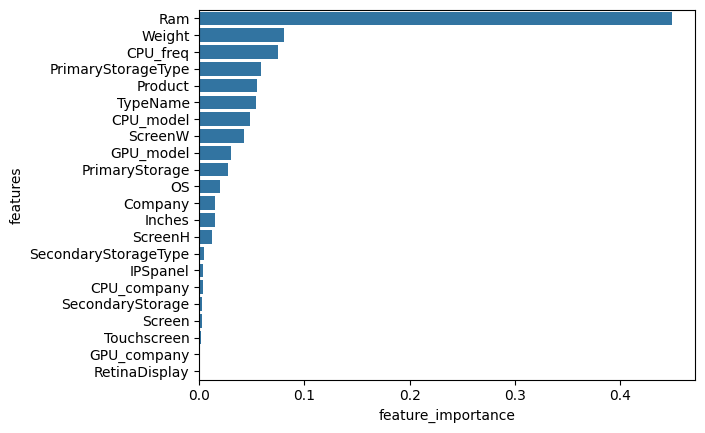

In [47]:
plot_features(X_train.columns, fea_imp)